### Abstract
众所周知，线性分类分为两种：
* 硬输出（直接输出样本的类别）：
    * 感知机
    * 线性判别分析
* 软输出（输出样本属于某类别的概率）：
    * 高斯判别分析
    * 逻辑回归
    
本期将介绍一种简单的线性二分类模型:感知机（Perceptron），它的要求比较松，只要能找到一个超平面将正负样本分割开就行。

### Idea
**错误驱动**

从字面上我们就可以看出，感知机模型的思路就是先随机初始化模型的参数，然后根据当前参数是否能够正确分割正负样本，通过错误来更新自己的参数。

### Algorithm
首先给出模型的目标函数：
$$
f(x)=sign(w^Tx)
$$
其中,$sign$是一个符号函数：
$$
sign(a)=
\begin{cases}
+1,\,\,a>0\\
-1,\,\,a\le0\\
\end{cases}
$$
那么根据上面提到的感知机的思想：错误驱动

我们很容易写出该模型的损失函数：
$$
\mathcal{L}(w)=\sum_{i=1}^n I\{w^Tx_i * y_i<0 \}
$$
其中，$I$是指示函数，表示有哪些元素属于该集合。

而判断条件也很好理解。我们注意到：
* 当$y_i>0$，即$y_i$为正例；
	* 此时，若$w^Tx_i<0$，则说明该样本被错误分类（$w^Tx_i* y_i<0$）
    * 若$w^Tx_i>0$，则说明该样本被正确分类（$w^Tx_i* y_i>0$）
* 当$y_i<0$，即$y_i$为负例；
	* 此时，若$w^Tx_i<0$，则说明该样本被正确分类（$w^Tx_i* y_i>0$）
    * 若$w^Tx_i>0$，则说明该样本被错误分类（$w^Tx_i* y_i<0$）
    
我们最终发现，当$w^Tx_i * y_i<0$时，可以表示样本被模型错误分类。

好，我们现在再回头看损失函数，我们惊奇地发现，这个损失函数居然是不可导的，没法梯度下降了，这可肿么办尼。

因此我们放宽了条件，损失函数更为：
$$
\mathcal{L(w)}=\mathcal{\sum_{(x_i,y_i)\in M}} -\mathcal{w^Tx_i* y_i}
$$
$M$表示被错误分类的样本的集合。

在$w^Tx_i* y_i$前面加个负号，就可以得到正的损失值了。这样就可以使用梯度下降算法更新参数$w$了。

至于这个损失函数的导数也很容易求嘛：

$$
\mathcal{\frac{dL(w)}{dw}}=\mathcal{\sum_{(x_i,y_i)\in M}} -\mathcal{x_i* y_i}
$$

### Implement

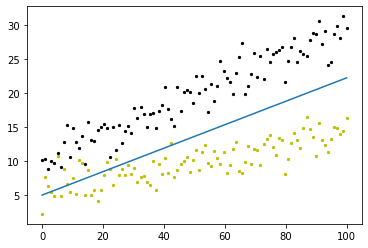

In [2]:
import os
os.chdir("../")
import numpy as np
from models.linear_models import Perceptron


model = Perceptron(10000, lr=1e-2)
x = np.linspace(0, 100, num=100)
w1, b1 = 0.1, 5
w2, b2 = 0.2, 10
epsilon = 2
k = 0.15
b = 8
w = np.asarray([-k, 1])
v1 = x * w1 + b1 + np.random.normal(scale=epsilon, size=x.shape)
v2 = x * w2 + b2 + np.random.normal(scale=epsilon, size=x.shape)
x1 = np.c_[x, v1]
x2 = np.c_[x, v2]
x = np.r_[x1, x2]
y = np.sign(x.dot(w) - b)
model.fit(x, y)
model.draw(x)

### 关于作者
[我在AI Studio上获得钻石等级，点亮8个徽章，来互关呀~ ](https://aistudio.baidu.com/aistudio/personalcenter/thirdview/345331)